# Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, recall_score, mean_absolute_percentage_error
import matplotlib.ticker as ticker

# Data preparation

● id - уникальный идентификатор столбца;

● ticket_id - уникальный идентификатор билета, считается, что у одного билета один владелец

● ticket_type_nm - тип билета

● entrance_id - уникальный id входа в станцию

● entrance_nm - название

● station_id - уникальное id станции захода

● station_nm - наименование станции захода

● line_id - уникальный id ветки на которой находится станция

● line_nm - наименование ветки на которой находится станция

● pass_dttm - дата валидации

● time_to_under (столбец для предсказания) - сколько времени прошло между первой и второй валидацией

● label (столбец для предсказания) - id второй станции, на которой произошла валидация

In [58]:
df = pd.read_csv('train_dataset_train.csv')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [59]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Список значений:\n{df[col]}")
    print(df[col])
    print('///////////////////////////////////////////////////')

Характеристика: id
Количество уникальных значений: 1091021
Список значений:
0                1
1                2
2                3
3                4
4                5
            ...   
1091016    1091017
1091017    1091018
1091018    1091019
1091019    1091020
1091020    1091021
Name: id, Length: 1091021, dtype: int64
0                1
1                2
2                3
3                4
4                5
            ...   
1091016    1091017
1091017    1091018
1091018    1091019
1091019    1091020
1091020    1091021
Name: id, Length: 1091021, dtype: int64
///////////////////////////////////////////////////
Характеристика: ticket_id
Количество уникальных значений: 335533
Список значений:
0          40BD89EC85646EFB69E283F39C298E60
1          126727A96489CC976A8C08E5CEB00542
2          D28CE6A9E0E5B6D213470A97CFF32485
3          015DA44B523C062B5BFEFF3FB0E64B9E
4          95B19C6F3A504727AC3EA56EB7E3E80F
                         ...               
1091016    6A738232F8E43DFCD

Количество уникальных значений: 60514
Список значений:
0           216.316667
1           648.183333
2           865.333333
3          1048.233333
4           965.600000
              ...     
1091016     124.750000
1091017      56.066667
1091018      91.283333
1091019      47.900000
1091020      34.100000
Name: time_to_under, Length: 1091021, dtype: float64
0           216.316667
1           648.183333
2           865.333333
3          1048.233333
4           965.600000
              ...     
1091016     124.750000
1091017      56.066667
1091018      91.283333
1091019      47.900000
1091020      34.100000
Name: time_to_under, Length: 1091021, dtype: float64
///////////////////////////////////////////////////
Характеристика: label
Количество уникальных значений: 276
Список значений:
0           8001
1           9011
2           7022
3           2022
4           2017
           ...  
1091016    15005
1091017     6007
1091018     2010
1091019    11014
1091020     7015
Name: label, Length

In [60]:
for col in cols:
    print(f'Наименование столбца: {col}, число пропусков:\t {df[col].isna().sum()}')

Наименование столбца: id, число пропусков:	 0
Наименование столбца: ticket_id, число пропусков:	 0
Наименование столбца: ticket_type_nm, число пропусков:	 0
Наименование столбца: entrance_id, число пропусков:	 0
Наименование столбца: entrance_nm, число пропусков:	 0
Наименование столбца: station_id, число пропусков:	 0
Наименование столбца: station_nm, число пропусков:	 0
Наименование столбца: line_id, число пропусков:	 0
Наименование столбца: line_nm, число пропусков:	 0
Наименование столбца: pass_dttm, число пропусков:	 0
Наименование столбца: time_to_under, число пропусков:	 0
Наименование столбца: label, число пропусков:	 0


В данных нет пропусков. Очень хорошо.


In [61]:
df = df.drop(['id', 'ticket_id', 'entrance_id', 'station_id', 'line_id', 'entrance_nm'], axis=1)

## Графики и т.д.

Преобразуем столбец со временем в тип DateTime, а затем распределим по дням недели

In [62]:
df.pass_dttm = pd.to_datetime(df.pass_dttm)
df['dayOfWeek'] = df.pass_dttm.dt.weekday
df['hour'] = df.pass_dttm.dt.hour
df.drop(['pass_dttm'], axis=1)

,ticket_type_nm,station_nm,line_nm,time_to_under,label,dayOfWeek,hour
0,Пропуск FacePay,Лефортово,Большая кольцевая,216.316667,8001,0,5
1,СК учащегося 30 дней,Войковская,Замоскворецкая,648.183333,9011,0,5
2,БСК дружинника г.Москвы,Войковская,Замоскворецкая,865.333333,7022,0,5
3,30 дней,Войковская,Замоскворецкая,1048.233333,2022,0,5
4,КОШЕЛЕК,Войковская,Замоскворецкая,965.600000,2017,0,5
...,...,...,...,...,...,...,...
1091016,Пропуск FacePay,Нижегородская,Некрасовская,124.750000,15005,0,2
1091017,Пропуск FacePay,Калужская,Калужско-Рижская,56.066667,6007,0,3
1091018,Пропуск FacePay,Каширская,Замоскворецкая,91.283333,2010,0,3
1091019,Пропуск FacePay,Воронцовская,Большая кольцевая,47.900000,11014,0,3


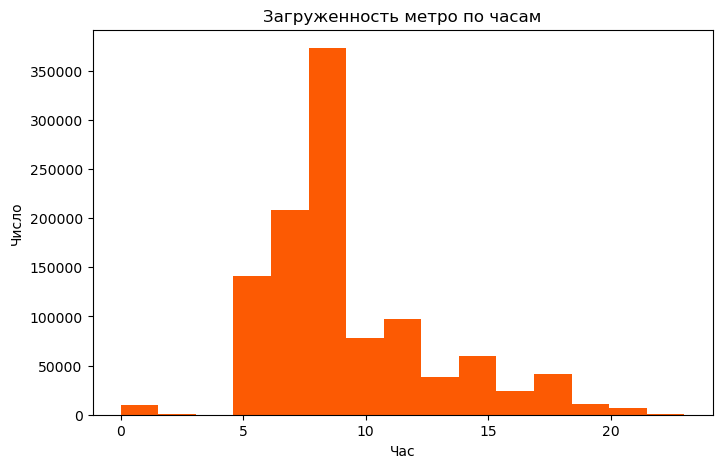

In [63]:
plt.figure(figsize=(8,5))
plt.hist(df.hour, bins=15, color='#fc5a03')
plt.xlabel('Час')
plt.ylabel('Число')
plt.title('Загруженность метро по часам');

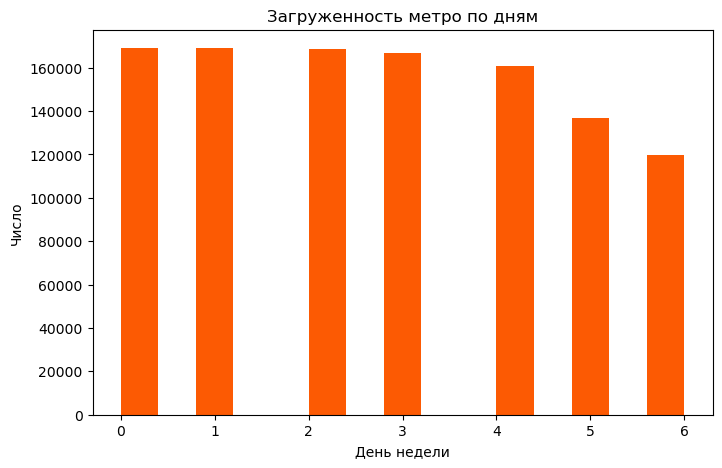

In [64]:
plt.figure(figsize=(8,5))
plt.hist(df.dayOfWeek, bins=15, color='#fc5a03')
plt.xlabel('День недели')
plt.ylabel('Число')
plt.title('Загруженность метро по дням');

Есть ярко выраженный час пик с 8 до 9 утра, а также разница между буднями и выходными. Добавим это разделение

In [65]:
rushHour = ['7', '8', '9']
df['isRushHour'] = False
df['isRushHour'].mask(df.hour.isin(rushHour), True, inplace=True)

weekend = ['5', '6']
df['isWeekend'] = False
df['isWeekend'].mask(df.hour.isin(weekend), True, inplace=True)

Ящик с усами для time_to_under

Text(0.5, 1.0, 'Ящик с усами для времени до второй валидации (с аномалиями)')

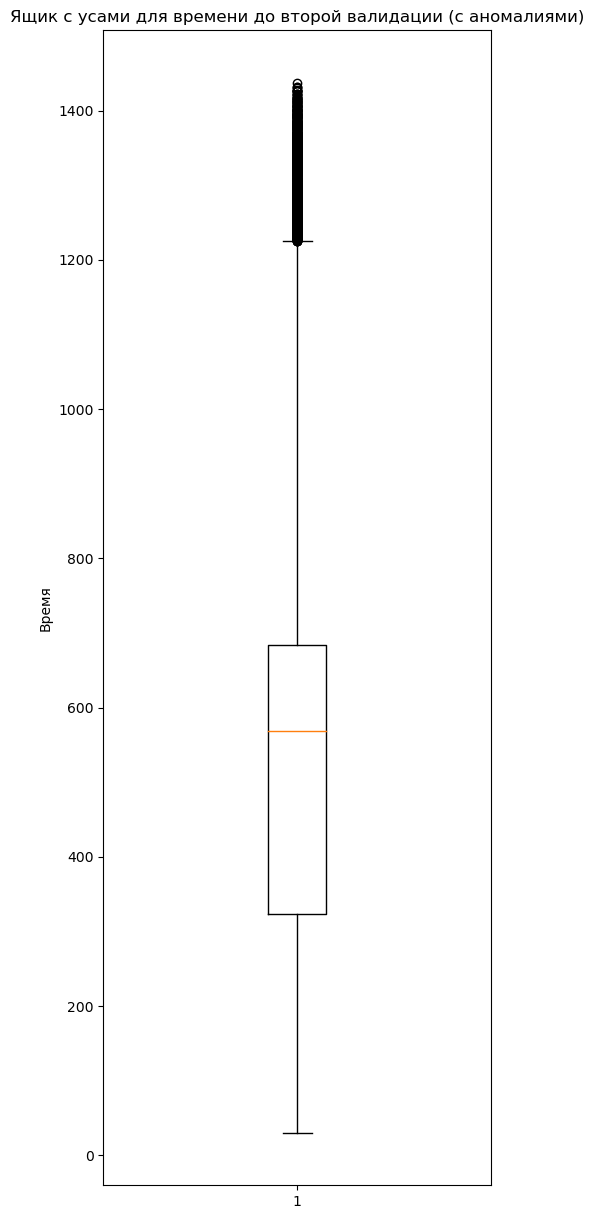

In [66]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.time_to_under)
ax.set_ylabel('Время')
ax.set_title('Ящик с усами для времени до второй валидации (с аномалиями)')

In [67]:
df.ticket_type_nm.unique()

array(['Пропуск FacePay', 'СК учащегося 30 дней',
       'БСК дружинника г.Москвы', '30 дней', 'КОШЕЛЕК',
       'СК студента 30 дней', '90 дней', '90 дней ЕДИНЫЙ ТК',
       '30 дней СК учащегося', '90 дней СК студента',
       '30 дней СК студента', 'ББК', 'СК аспиранта 90 дней',
       'Социальная карта москвича', '30 дней ЕДИНЫЙ ТК',
       'Социальная карта жителя Моск. области', '30 дней Пригород ТК',
       'Социальная карта москвича с сопровождающим',
       'Пропуск сотрудника УВД по охране Метрополитена',
       '60 поездок ЕДИНЫЙ ТК', 'СК для сотрудника ГУВД г.Москвы',
       '365 дней ЕДИНЫЙ ТК', 'ВЕСБ МОСКВА (7мин)', 'СК студента 90 дней',
       '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК',
       '365 дней', 'СК ординатора 30 дней', '30 дней СК аспиранта',
       '30 дней СК ординатора', '90 дней СК ординатора',
       'ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'СК ординатора 90 дней',
       'СК аспиранта 30 дней', '90 дней СК учащегося',
       'Времен

Из всего множества можно выделить подгруппы, например ск учащихся и студентов объеденить в одну группу и т.д. 

In [68]:
studentPass = ['СК студента 30 дней', 'СК учащегося 30 дней', '30 дней СК учащегося', '90 дней СК студента',
                '30 дней СК студента', 'СК ординатора 90 дней', 'СК аспиранта 90 дней', 'СК учащегося 90 дней',
                'СК аспиранта 30 дней', '90 дней СК учащегося', 'СК ординатора 30 дней', '30 дней СК аспиранта',
                '30 дней СК ординатора', '90 дней СК ординатора', 'СК студента 90 дней', '90 дней СК аспиранта']
subwayWorkerPass = ['Пропуск сотрудника УВД по охране Метрополитена', 'Пропуск сотрудника МЦК',
                   'Пропуск руководителя метрополитена', 'Пропуск сотрудника метрополитена',
                   'СК ассистента-стажера 30 дней', 'СК ассистента-стажера 90 дней', '30 дней СК ассистента-стажера', 
                    'Пропуск  сотрудника МЦК', 'Пропуск сотрудника  метрополитена']
moneyPass = ['Пропуск FacePay', 'КОШЕЛЕК', 'Безналичная транспортная карта']
socialPass = ['Социальная карта жителя Моск. области с сопровождающим', 'Социальная карта жителя Моск. области', 
              'Социальная карта москвича с сопровождающим', 'Социальная карта москвича', 'БСК дружинника г.Москвы', 
              'СК для сотрудника ГУВД г.Москвы', 'ВЛБ МОСКВА', 'ВЕСБ МО с сопровождающим', 'ВЕСБ МОСКВА (7мин)', 
              'ВЕСБ МО (тип 5)', 'ВЕСБ МО (тип 6)', 'ВЕСБ МОСКВА', 'ВЕСБ МО (7 мин)', 'Временный билет ММ']
suburbanPass = ['1 сутки Пригород ТК', '90 дней Пригород', '365 дней Пригород', '30 дней Пригород', '90 дней Пригород ТК',
                '30 дней Пригород ТК', '365 дней Пригород ТК', 'ББК', '30 дней  Пригород', '90 дней  Пригород', '365 дней  Пригород']
justPass = ['30 дней', '90 дней', '30 дней ЕДИНЫЙ ТК', '60 поездок ЕДИНЫЙ ТК', '365 дней ЕДИНЫЙ ТК' , '365 дней', 
            '3 суток Единый ТК', '1 сутки ЕДИНЫЙ ТК', 'Ультралайт Единый (70)', 'Билет 3 суток ЕДИНЫЙ', 'Билет 3 суток ЕДИНЫЙ',
            '90 дней ЕДИНЫЙ ТК', 'Билет 1 сутки ЕДИНЫЙ']

In [69]:
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(subwayWorkerPass), 'subwayWorkerPass', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(moneyPass), 'moneyPass', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(studentPass), 'studentPass', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(suburbanPass), 'suburbanPass', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(socialPass), 'socialPass', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(justPass ), 'justPass', inplace=True)

In [70]:
df.head()

,ticket_type_nm,station_nm,line_nm,pass_dttm,time_to_under,label,dayOfWeek,hour,isRushHour,isWeekend
0,moneyPass,Лефортово,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,0,5,False,False
1,studentPass,Войковская,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,0,5,False,False
2,socialPass,Войковская,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,0,5,False,False
3,justPass,Войковская,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,0,5,False,False
4,moneyPass,Войковская,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,0,5,False,False


moneyPass
studentPass
socialPass
justPass
suburbanPass
subwayWorkerPass


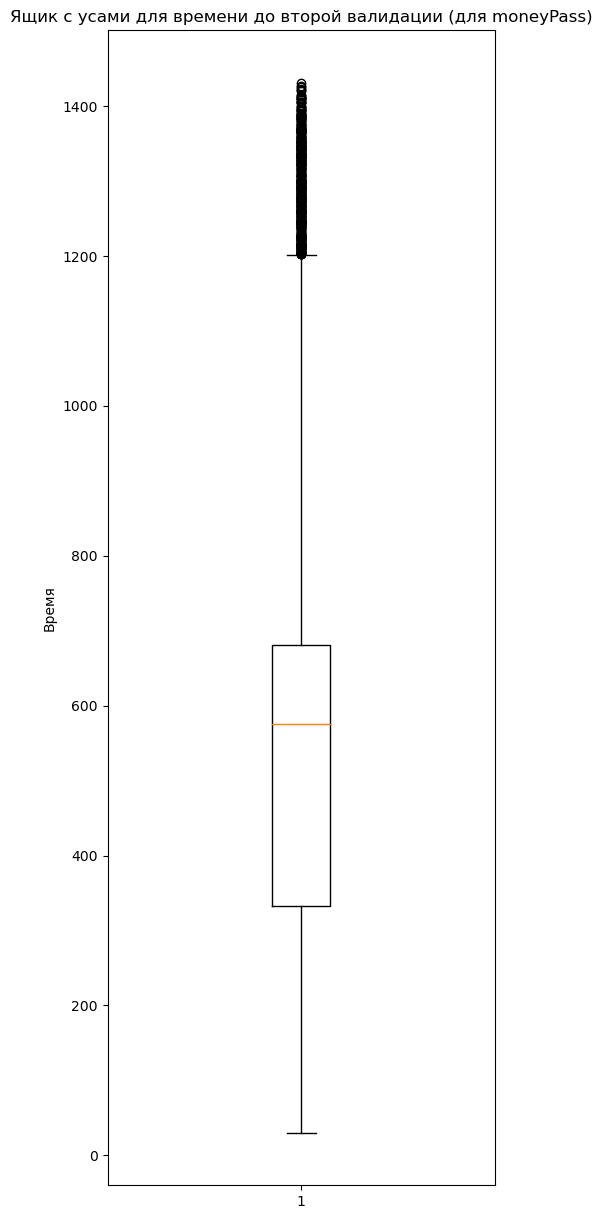

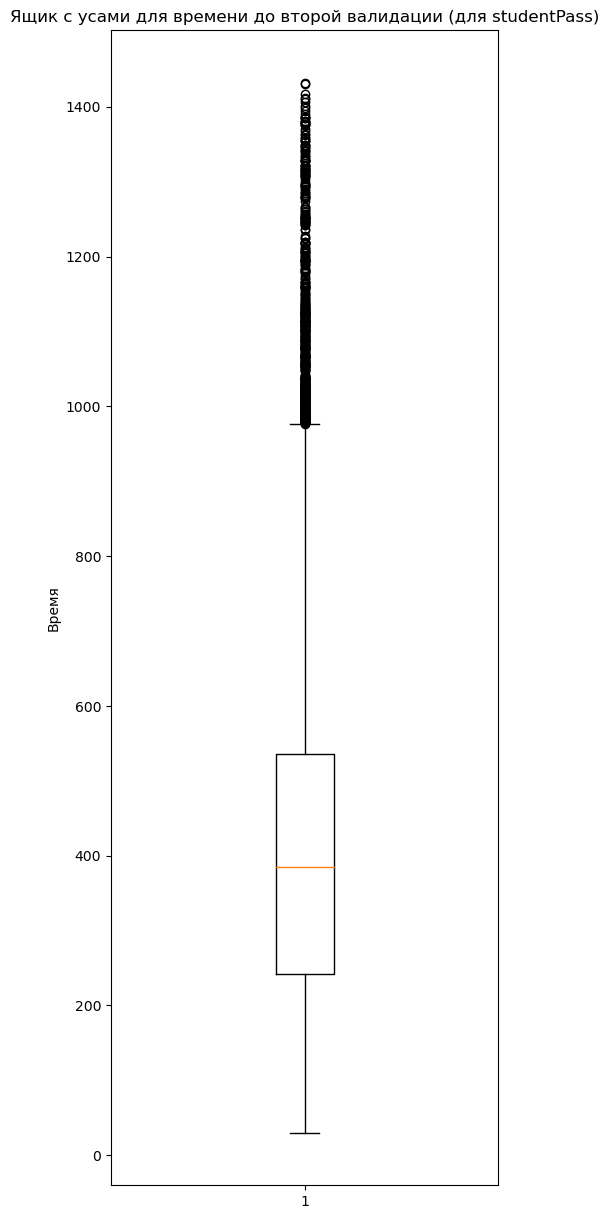

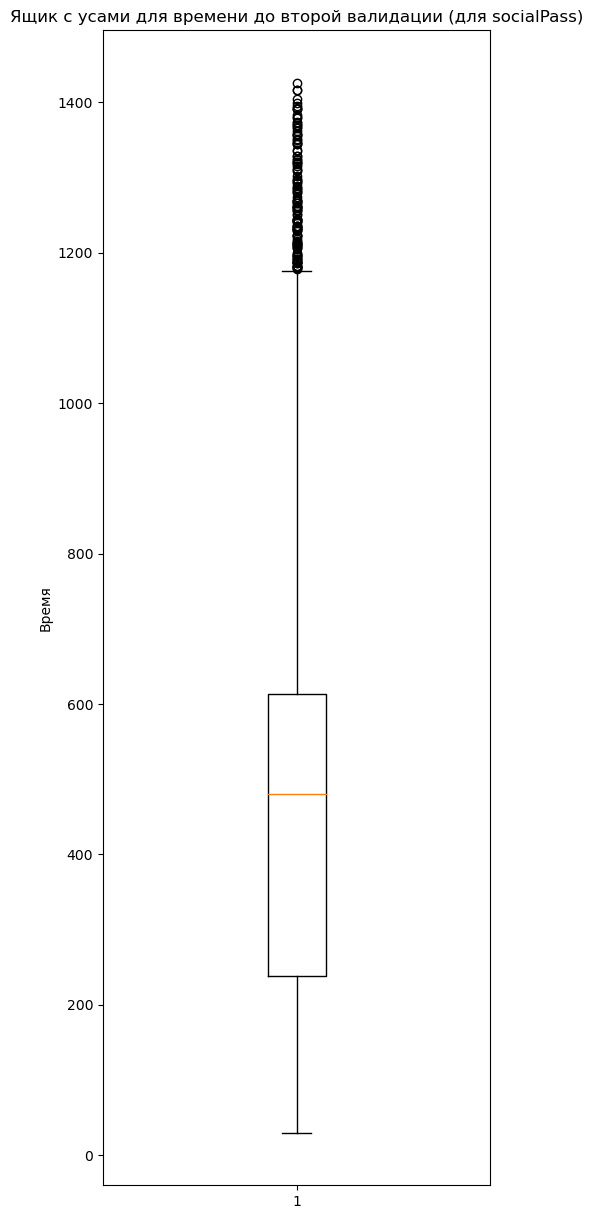

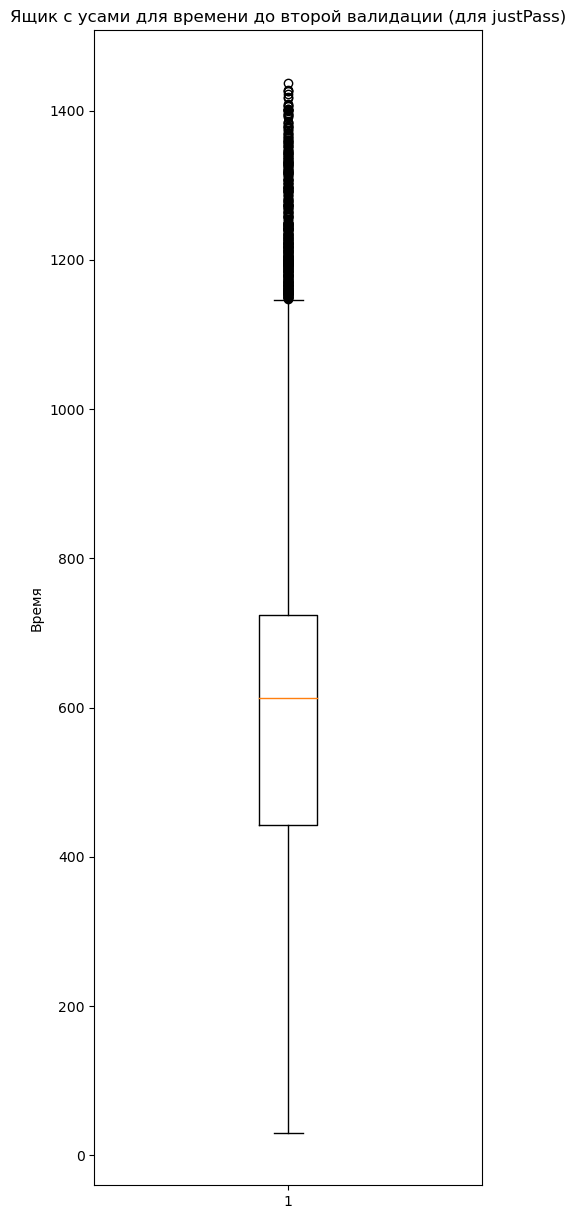

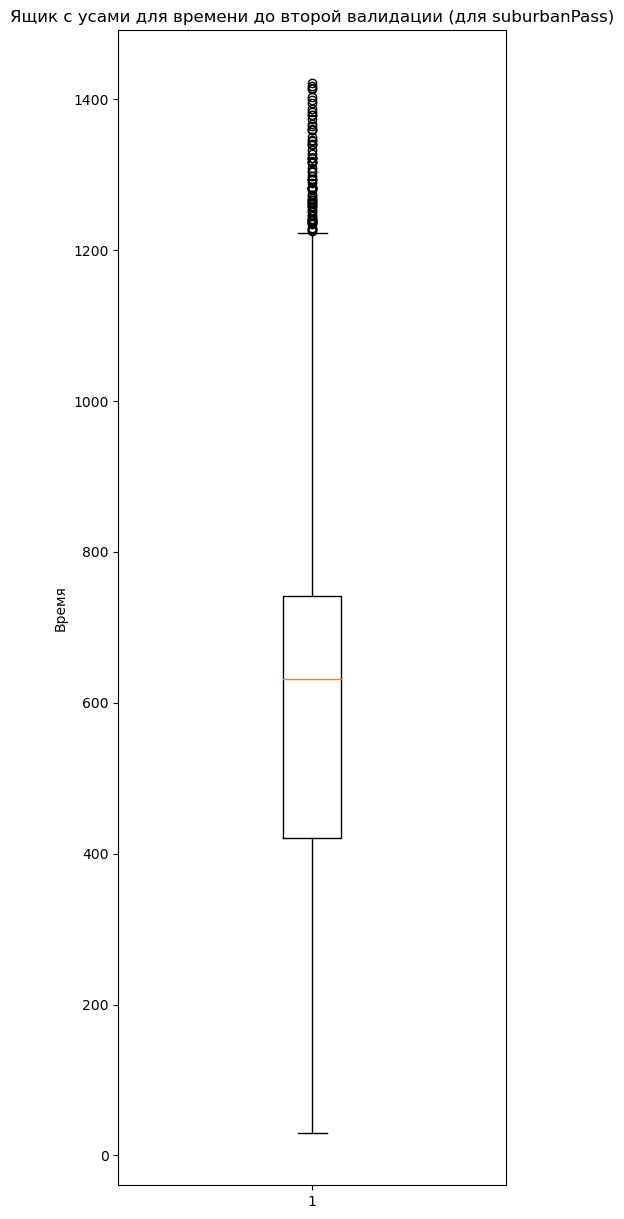

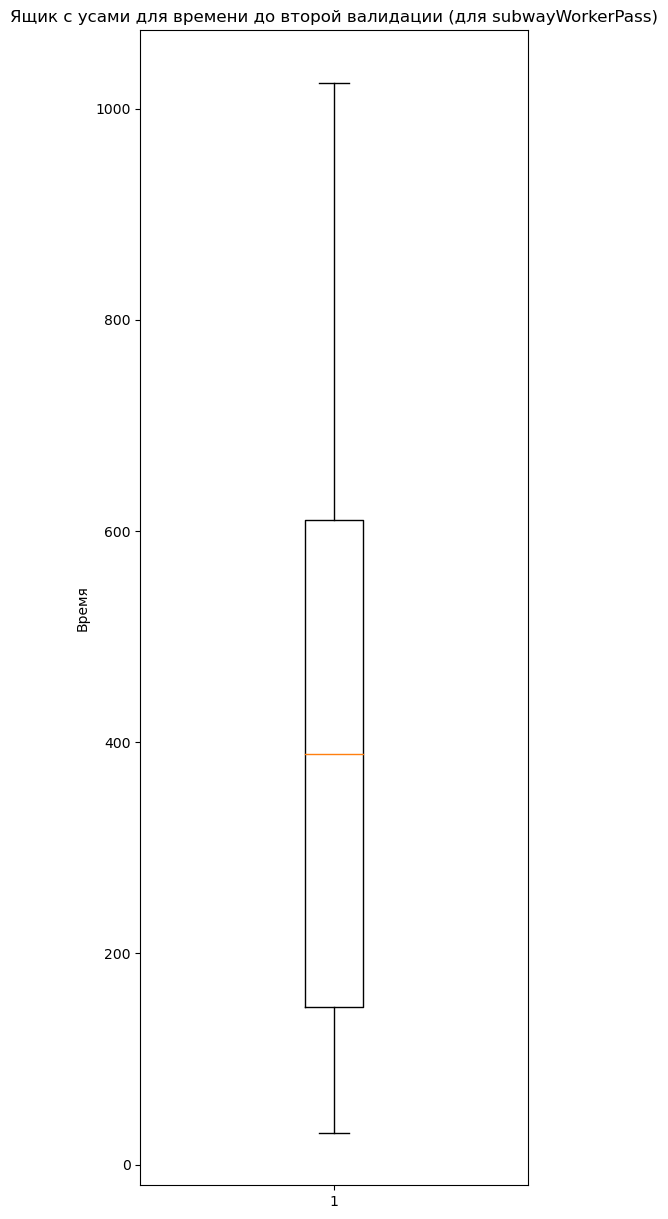

In [71]:
for ticketType in df.ticket_type_nm.unique():
    print(ticketType)
    fig, ax = plt.subplots(figsize=(5, 15))
    ax.boxplot(df.loc[df.ticket_type_nm == ticketType].time_to_under)
    ax.set_ylabel('Время')
    ax.set_title(f'Ящик с усами для времени до второй валидации (для {ticketType})')


In [72]:
x_regress_train, x_regress_test, y_regress_train, y_regress_test = train_test_split(df.drop(columns=['time_to_under']), 
                                                                                    df[['time_to_under']], test_size=0.2)


pipe_regression = Pipeline(steps=[('model', CatBoostRegressor(cat_features=['ticket_type_nm', 'station_nm','line_nm', 'hour','isRushHour', 'isWeekend']))])
pipe_regression.fit(x_regress_train, y_regress_train)
forecast_regress = pipe_regression.predict(x_regress_test)

Learning rate set to 0.119356
0:	learn: 219.4694799	total: 347ms	remaining: 5m 47s
1:	learn: 208.4248586	total: 445ms	remaining: 3m 42s
2:	learn: 199.4331837	total: 547ms	remaining: 3m 1s
3:	learn: 192.0321648	total: 678ms	remaining: 2m 48s
4:	learn: 186.0979665	total: 850ms	remaining: 2m 49s
5:	learn: 181.2813240	total: 949ms	remaining: 2m 37s
6:	learn: 177.4406373	total: 1.12s	remaining: 2m 39s
7:	learn: 174.3086040	total: 1.22s	remaining: 2m 31s
8:	learn: 171.8586757	total: 1.31s	remaining: 2m 24s
9:	learn: 169.8727277	total: 1.41s	remaining: 2m 19s
10:	learn: 168.2555403	total: 1.51s	remaining: 2m 15s
11:	learn: 166.9953221	total: 1.63s	remaining: 2m 14s
12:	learn: 165.9684434	total: 1.81s	remaining: 2m 17s
13:	learn: 165.1475949	total: 1.91s	remaining: 2m 14s
14:	learn: 164.4841148	total: 2.02s	remaining: 2m 12s
15:	learn: 163.9592452	total: 2.15s	remaining: 2m 12s
16:	learn: 163.5286748	total: 2.27s	remaining: 2m 11s
17:	learn: 163.1709248	total: 2.45s	remaining: 2m 13s
18:	learn

151:	learn: 158.8936102	total: 29s	remaining: 2m 41s
152:	learn: 158.8833080	total: 29.3s	remaining: 2m 42s
153:	learn: 158.8739677	total: 29.5s	remaining: 2m 41s
154:	learn: 158.8673670	total: 29.7s	remaining: 2m 41s
155:	learn: 158.8591869	total: 29.9s	remaining: 2m 41s
156:	learn: 158.8398355	total: 30.1s	remaining: 2m 41s
157:	learn: 158.8233118	total: 30.4s	remaining: 2m 41s
158:	learn: 158.8134171	total: 30.6s	remaining: 2m 41s
159:	learn: 158.8061199	total: 30.9s	remaining: 2m 41s
160:	learn: 158.7962935	total: 31.1s	remaining: 2m 41s
161:	learn: 158.7867762	total: 31.3s	remaining: 2m 41s
162:	learn: 158.7795285	total: 31.5s	remaining: 2m 41s
163:	learn: 158.7739083	total: 31.6s	remaining: 2m 41s
164:	learn: 158.7670101	total: 31.7s	remaining: 2m 40s
165:	learn: 158.7614465	total: 31.9s	remaining: 2m 40s
166:	learn: 158.7527888	total: 32.2s	remaining: 2m 40s
167:	learn: 158.7449025	total: 32.4s	remaining: 2m 40s
168:	learn: 158.7317994	total: 32.6s	remaining: 2m 40s
169:	learn: 

301:	learn: 157.9193918	total: 58.7s	remaining: 2m 15s
302:	learn: 157.9125816	total: 58.9s	remaining: 2m 15s
303:	learn: 157.9103262	total: 59.1s	remaining: 2m 15s
304:	learn: 157.9066409	total: 59.3s	remaining: 2m 15s
305:	learn: 157.9021207	total: 59.5s	remaining: 2m 15s
306:	learn: 157.8984545	total: 59.7s	remaining: 2m 14s
307:	learn: 157.8942543	total: 60s	remaining: 2m 14s
308:	learn: 157.8897328	total: 1m	remaining: 2m 14s
309:	learn: 157.8839949	total: 1m	remaining: 2m 14s
310:	learn: 157.8743738	total: 1m	remaining: 2m 14s
311:	learn: 157.8706137	total: 1m	remaining: 2m 14s
312:	learn: 157.8667021	total: 1m 1s	remaining: 2m 14s
313:	learn: 157.8644529	total: 1m 1s	remaining: 2m 13s
314:	learn: 157.8609021	total: 1m 1s	remaining: 2m 13s
315:	learn: 157.8574611	total: 1m 1s	remaining: 2m 13s
316:	learn: 157.8547531	total: 1m 1s	remaining: 2m 13s
317:	learn: 157.8485426	total: 1m 2s	remaining: 2m 13s
318:	learn: 157.8463686	total: 1m 2s	remaining: 2m 12s
319:	learn: 157.8418224	

450:	learn: 157.3299782	total: 1m 28s	remaining: 1m 47s
451:	learn: 157.3264493	total: 1m 28s	remaining: 1m 47s
452:	learn: 157.3221265	total: 1m 29s	remaining: 1m 47s
453:	learn: 157.3202361	total: 1m 29s	remaining: 1m 47s
454:	learn: 157.3193976	total: 1m 29s	remaining: 1m 47s
455:	learn: 157.3173288	total: 1m 29s	remaining: 1m 46s
456:	learn: 157.3125851	total: 1m 29s	remaining: 1m 46s
457:	learn: 157.3055086	total: 1m 29s	remaining: 1m 46s
458:	learn: 157.3034943	total: 1m 30s	remaining: 1m 46s
459:	learn: 157.3004124	total: 1m 30s	remaining: 1m 45s
460:	learn: 157.2970094	total: 1m 30s	remaining: 1m 45s
461:	learn: 157.2936853	total: 1m 30s	remaining: 1m 45s
462:	learn: 157.2920267	total: 1m 30s	remaining: 1m 45s
463:	learn: 157.2882703	total: 1m 31s	remaining: 1m 45s
464:	learn: 157.2856170	total: 1m 31s	remaining: 1m 45s
465:	learn: 157.2827826	total: 1m 31s	remaining: 1m 44s
466:	learn: 157.2799848	total: 1m 31s	remaining: 1m 44s
467:	learn: 157.2778353	total: 1m 31s	remaining:

598:	learn: 156.8937948	total: 1m 58s	remaining: 1m 19s
599:	learn: 156.8901504	total: 1m 59s	remaining: 1m 19s
600:	learn: 156.8878570	total: 1m 59s	remaining: 1m 19s
601:	learn: 156.8869845	total: 1m 59s	remaining: 1m 18s
602:	learn: 156.8836651	total: 1m 59s	remaining: 1m 18s
603:	learn: 156.8800085	total: 1m 59s	remaining: 1m 18s
604:	learn: 156.8785993	total: 2m	remaining: 1m 18s
605:	learn: 156.8770283	total: 2m	remaining: 1m 18s
606:	learn: 156.8751418	total: 2m	remaining: 1m 17s
607:	learn: 156.8724539	total: 2m	remaining: 1m 17s
608:	learn: 156.8692539	total: 2m	remaining: 1m 17s
609:	learn: 156.8674149	total: 2m 1s	remaining: 1m 17s
610:	learn: 156.8635183	total: 2m 1s	remaining: 1m 17s
611:	learn: 156.8619397	total: 2m 1s	remaining: 1m 16s
612:	learn: 156.8600733	total: 2m 1s	remaining: 1m 16s
613:	learn: 156.8570946	total: 2m 1s	remaining: 1m 16s
614:	learn: 156.8543725	total: 2m 2s	remaining: 1m 16s
615:	learn: 156.8529904	total: 2m 2s	remaining: 1m 16s
616:	learn: 156.852

748:	learn: 156.5625954	total: 2m 30s	remaining: 50.3s
749:	learn: 156.5609987	total: 2m 30s	remaining: 50.1s
750:	learn: 156.5602070	total: 2m 30s	remaining: 49.9s
751:	learn: 156.5513269	total: 2m 30s	remaining: 49.7s
752:	learn: 156.5490005	total: 2m 31s	remaining: 49.6s
753:	learn: 156.5482715	total: 2m 31s	remaining: 49.3s
754:	learn: 156.5474570	total: 2m 31s	remaining: 49.1s
755:	learn: 156.5452095	total: 2m 31s	remaining: 49s
756:	learn: 156.5441986	total: 2m 31s	remaining: 48.8s
757:	learn: 156.5401825	total: 2m 32s	remaining: 48.6s
758:	learn: 156.5396473	total: 2m 32s	remaining: 48.4s
759:	learn: 156.5385276	total: 2m 32s	remaining: 48.2s
760:	learn: 156.5367451	total: 2m 32s	remaining: 48s
761:	learn: 156.5355363	total: 2m 33s	remaining: 47.8s
762:	learn: 156.5333261	total: 2m 33s	remaining: 47.6s
763:	learn: 156.5322341	total: 2m 33s	remaining: 47.4s
764:	learn: 156.5242225	total: 2m 33s	remaining: 47.2s
765:	learn: 156.5237735	total: 2m 33s	remaining: 47s
766:	learn: 156.

898:	learn: 156.2330102	total: 3m 2s	remaining: 20.5s
899:	learn: 156.2317360	total: 3m 2s	remaining: 20.3s
900:	learn: 156.2305625	total: 3m 2s	remaining: 20.1s
901:	learn: 156.2293462	total: 3m 2s	remaining: 19.8s
902:	learn: 156.2262766	total: 3m 2s	remaining: 19.6s
903:	learn: 156.2252577	total: 3m 3s	remaining: 19.4s
904:	learn: 156.2245259	total: 3m 3s	remaining: 19.2s
905:	learn: 156.2233385	total: 3m 3s	remaining: 19s
906:	learn: 156.2227054	total: 3m 3s	remaining: 18.8s
907:	learn: 156.2188430	total: 3m 4s	remaining: 18.6s
908:	learn: 156.2176125	total: 3m 4s	remaining: 18.4s
909:	learn: 156.2138230	total: 3m 4s	remaining: 18.2s
910:	learn: 156.2122071	total: 3m 4s	remaining: 18s
911:	learn: 156.2100751	total: 3m 4s	remaining: 17.8s
912:	learn: 156.2073336	total: 3m 5s	remaining: 17.6s
913:	learn: 156.2057643	total: 3m 5s	remaining: 17.4s
914:	learn: 156.2048479	total: 3m 5s	remaining: 17.2s
915:	learn: 156.2018951	total: 3m 5s	remaining: 17s
916:	learn: 156.1978522	total: 3m 

In [73]:
r2_score(forecast_regress, y_regress_test)

0.15711393931996243

Классификация

In [74]:
x_train_class = df.drop(columns=['label'])[:600]
y_train_class = df[['label']][:600]

test_class = df.loc[df.ticket_type_nm.isin(x_train_class.ticket_type_nm)&
                    df.station_nm.isin(x_train_class.station_nm) &
                    df.line_nm.isin(x_train_class.line_nm) ]

x_test_class = test_class.drop(columns=['label'])[:180]
y_test_class = test_class[['label']][:180]

pipe_multiclass = Pipeline(steps=[('model', CatBoostClassifier(cat_features=['ticket_type_nm', 'station_nm','line_nm', 'hour','isRushHour', 'isWeekend']))])
pipe_multiclass.fit(x_train_class, y_train_class)
forecast_class = pipe_multiclass.predict(x_test_class)

Learning rate set to 0.077092
0:	learn: 5.2833617	total: 3.6s	remaining: 59m 58s
1:	learn: 5.2540269	total: 7.41s	remaining: 1h 1m 35s
2:	learn: 5.2192959	total: 11.2s	remaining: 1h 1m 58s
3:	learn: 5.1900961	total: 15s	remaining: 1h 2m 13s
4:	learn: 5.1571995	total: 19.2s	remaining: 1h 3m 35s
5:	learn: 5.1300353	total: 23s	remaining: 1h 3m 27s
6:	learn: 5.0998062	total: 26.9s	remaining: 1h 3m 32s
7:	learn: 5.0729295	total: 31.2s	remaining: 1h 4m 31s
8:	learn: 5.0498803	total: 35.1s	remaining: 1h 4m 20s
9:	learn: 5.0322127	total: 35.2s	remaining: 58m
10:	learn: 5.0065798	total: 39s	remaining: 58m 23s
11:	learn: 4.9796070	total: 43.1s	remaining: 59m 10s
12:	learn: 4.9524129	total: 47.4s	remaining: 59m 58s
13:	learn: 4.9241597	total: 51.2s	remaining: 1h 6s
14:	learn: 4.9017590	total: 55.4s	remaining: 1h 35s
15:	learn: 4.8784072	total: 59.8s	remaining: 1h 1m 18s
16:	learn: 4.8536548	total: 1m 4s	remaining: 1h 1m 54s
17:	learn: 4.8399451	total: 1m 4s	remaining: 58m 36s
18:	learn: 4.8212109

153:	learn: 2.9105200	total: 10m 58s	remaining: 1h 17s
154:	learn: 2.9007253	total: 11m 4s	remaining: 1h 20s
155:	learn: 2.8948669	total: 11m 9s	remaining: 1h 23s
156:	learn: 2.8817113	total: 11m 15s	remaining: 1h 26s
157:	learn: 2.8737876	total: 11m 20s	remaining: 1h 25s
158:	learn: 2.8636586	total: 11m 24s	remaining: 1h 18s
159:	learn: 2.8630877	total: 11m 28s	remaining: 1h 15s
160:	learn: 2.8504396	total: 11m 34s	remaining: 1h 18s
161:	learn: 2.8394596	total: 11m 38s	remaining: 1h 13s
162:	learn: 2.8352222	total: 11m 45s	remaining: 1h 22s
163:	learn: 2.8281931	total: 11m 49s	remaining: 1h 15s
164:	learn: 2.8221738	total: 11m 53s	remaining: 1h 8s
165:	learn: 2.8093758	total: 11m 58s	remaining: 1h 8s
166:	learn: 2.8041418	total: 12m 2s	remaining: 1h 2s
167:	learn: 2.7922028	total: 12m 6s	remaining: 59m 57s
168:	learn: 2.7871104	total: 12m 10s	remaining: 59m 53s
169:	learn: 2.7745752	total: 12m 17s	remaining: 59m 59s
170:	learn: 2.7647866	total: 12m 22s	remaining: 1h
171:	learn: 2.7524

301:	learn: 1.6244814	total: 22m 47s	remaining: 52m 40s
302:	learn: 1.6155574	total: 22m 53s	remaining: 52m 39s
303:	learn: 1.6072992	total: 22m 57s	remaining: 52m 33s
304:	learn: 1.5981029	total: 23m 3s	remaining: 52m 32s
305:	learn: 1.5972484	total: 23m 10s	remaining: 52m 32s
306:	learn: 1.5913136	total: 23m 14s	remaining: 52m 27s
307:	learn: 1.5842530	total: 23m 20s	remaining: 52m 27s
308:	learn: 1.5781222	total: 23m 24s	remaining: 52m 21s
309:	learn: 1.5685564	total: 23m 29s	remaining: 52m 16s
310:	learn: 1.5604840	total: 23m 33s	remaining: 52m 10s
311:	learn: 1.5521462	total: 23m 36s	remaining: 52m 4s
312:	learn: 1.5451838	total: 23m 42s	remaining: 52m 2s
313:	learn: 1.5362661	total: 23m 47s	remaining: 51m 58s
314:	learn: 1.5273708	total: 23m 51s	remaining: 51m 53s
315:	learn: 1.5196814	total: 23m 55s	remaining: 51m 47s
316:	learn: 1.5132836	total: 24m	remaining: 51m 42s
317:	learn: 1.5055781	total: 24m 6s	remaining: 51m 41s
318:	learn: 1.4974606	total: 24m 10s	remaining: 51m 36s


449:	learn: 0.8712675	total: 34m 10s	remaining: 41m 45s
450:	learn: 0.8679869	total: 34m 14s	remaining: 41m 41s
451:	learn: 0.8638887	total: 34m 18s	remaining: 41m 35s
452:	learn: 0.8608274	total: 34m 22s	remaining: 41m 30s
453:	learn: 0.8557845	total: 34m 26s	remaining: 41m 25s
454:	learn: 0.8515299	total: 34m 31s	remaining: 41m 20s
455:	learn: 0.8478930	total: 34m 34s	remaining: 41m 15s
456:	learn: 0.8443860	total: 34m 39s	remaining: 41m 10s
457:	learn: 0.8422947	total: 34m 43s	remaining: 41m 5s
458:	learn: 0.8402190	total: 34m 47s	remaining: 41m
459:	learn: 0.8347099	total: 34m 51s	remaining: 40m 54s
460:	learn: 0.8314721	total: 34m 56s	remaining: 40m 51s
461:	learn: 0.8265750	total: 35m	remaining: 40m 46s
462:	learn: 0.8216887	total: 35m 5s	remaining: 40m 41s
463:	learn: 0.8178393	total: 35m 10s	remaining: 40m 38s
464:	learn: 0.8151322	total: 35m 15s	remaining: 40m 34s
465:	learn: 0.8111492	total: 35m 19s	remaining: 40m 28s
466:	learn: 0.8077067	total: 35m 23s	remaining: 40m 24s
46

597:	learn: 0.5070650	total: 45m 32s	remaining: 30m 36s
598:	learn: 0.5048122	total: 45m 35s	remaining: 30m 31s
599:	learn: 0.5040214	total: 45m 40s	remaining: 30m 26s
600:	learn: 0.5024200	total: 45m 44s	remaining: 30m 22s
601:	learn: 0.5008132	total: 45m 50s	remaining: 30m 18s
602:	learn: 0.4997135	total: 45m 55s	remaining: 30m 13s
603:	learn: 0.4981342	total: 45m 59s	remaining: 30m 9s
604:	learn: 0.4971186	total: 46m 2s	remaining: 30m 3s
605:	learn: 0.4965185	total: 46m 6s	remaining: 29m 58s
606:	learn: 0.4956802	total: 46m 11s	remaining: 29m 54s
607:	learn: 0.4942069	total: 46m 16s	remaining: 29m 50s
608:	learn: 0.4924847	total: 46m 21s	remaining: 29m 46s
609:	learn: 0.4905560	total: 46m 26s	remaining: 29m 41s
610:	learn: 0.4890409	total: 46m 29s	remaining: 29m 36s
611:	learn: 0.4874272	total: 46m 34s	remaining: 29m 31s
612:	learn: 0.4852911	total: 46m 38s	remaining: 29m 26s
613:	learn: 0.4844990	total: 46m 42s	remaining: 29m 21s
614:	learn: 0.4826341	total: 46m 46s	remaining: 29m 

745:	learn: 0.3347447	total: 56m 32s	remaining: 19m 14s
746:	learn: 0.3335153	total: 56m 37s	remaining: 19m 10s
747:	learn: 0.3322889	total: 56m 42s	remaining: 19m 6s
748:	learn: 0.3319325	total: 56m 47s	remaining: 19m 1s
749:	learn: 0.3311031	total: 56m 52s	remaining: 18m 57s
750:	learn: 0.3304855	total: 56m 58s	remaining: 18m 53s
751:	learn: 0.3296877	total: 57m 1s	remaining: 18m 48s
752:	learn: 0.3292617	total: 57m 6s	remaining: 18m 43s
753:	learn: 0.3285764	total: 57m 10s	remaining: 18m 39s
754:	learn: 0.3277444	total: 57m 15s	remaining: 18m 34s
755:	learn: 0.3269618	total: 57m 19s	remaining: 18m 30s
756:	learn: 0.3259086	total: 57m 24s	remaining: 18m 25s
757:	learn: 0.3252275	total: 57m 28s	remaining: 18m 20s
758:	learn: 0.3244478	total: 57m 32s	remaining: 18m 16s
759:	learn: 0.3236738	total: 57m 36s	remaining: 18m 11s
760:	learn: 0.3228925	total: 57m 40s	remaining: 18m 6s
761:	learn: 0.3217258	total: 57m 44s	remaining: 18m 2s
762:	learn: 0.3207194	total: 57m 48s	remaining: 17m 57

891:	learn: 0.2446994	total: 1h 7m 26s	remaining: 8m 9s
892:	learn: 0.2440344	total: 1h 7m 30s	remaining: 8m 5s
893:	learn: 0.2439579	total: 1h 7m 34s	remaining: 8m
894:	learn: 0.2436177	total: 1h 7m 38s	remaining: 7m 56s
895:	learn: 0.2431959	total: 1h 7m 42s	remaining: 7m 51s
896:	learn: 0.2426457	total: 1h 7m 46s	remaining: 7m 46s
897:	learn: 0.2423173	total: 1h 7m 51s	remaining: 7m 42s
898:	learn: 0.2417914	total: 1h 7m 55s	remaining: 7m 37s
899:	learn: 0.2412515	total: 1h 7m 59s	remaining: 7m 33s
900:	learn: 0.2405884	total: 1h 8m 5s	remaining: 7m 28s
901:	learn: 0.2404566	total: 1h 8m 9s	remaining: 7m 24s
902:	learn: 0.2397686	total: 1h 8m 13s	remaining: 7m 19s
903:	learn: 0.2393995	total: 1h 8m 18s	remaining: 7m 15s
904:	learn: 0.2387885	total: 1h 8m 23s	remaining: 7m 10s
905:	learn: 0.2385347	total: 1h 8m 28s	remaining: 7m 6s
906:	learn: 0.2380599	total: 1h 8m 34s	remaining: 7m 1s
907:	learn: 0.2375793	total: 1h 8m 39s	remaining: 6m 57s
908:	learn: 0.2370774	total: 1h 8m 43s	re

In [83]:
def Score(actualClass, forecastClass, actualRegress, forecastRegress):
    print('recall: ',recall_score(actualClass, forecastClass, average='micro'))
    print('R2: ',r2_score(actualRegress, forecastRegress))
    print('Score :'  ,0.5 * r2_score(actualRegress, forecastRegress) + 0.5 * recall_score(actualClass, forecastClass, average='micro'))

In [84]:
Score(y_test_class, forecast_class, y_regress_test, forecast_regress)


recall:  0.2111111111111111
R2:  0.5472354993508066
Score : 0.3791733052309589
